In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import normalize
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fillKNN_data_final_final.csv')
df.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3,4,1020.0,1375.0,1,6.0,218.0,1781.0,55.0,...,5.0,238.0,270.0,1781.0,154.0,1,2,1935.0,2519.0,1763.0
1,7.8,7,4,1680.0,1745.0,1,2.0,115.0,1968.0,73.0,...,5.0,241.0,400.0,1968.0,150.0,1,1,2425.0,2924.0,1886.0
2,9.2,7,30,1668.0,1188.0,0,4.0,146.0,1798.0,50.0,...,5.0,210.0,174.0,1798.0,104.0,1,2,1790.0,2595.0,1770.0
3,9.5,7,4,1680.0,1685.0,0,1.0,109.0,1968.0,73.0,...,5.0,219.0,370.0,1968.0,120.0,1,1,2330.0,2924.0,1886.0
4,7.0,7,4,1680.0,1680.0,0,2.0,144.0,1984.0,73.0,...,5.0,250.0,370.0,1984.0,180.0,1,1,2310.0,2924.0,1886.0


In [3]:
df.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'payload',
       'price', 'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

CORRELATION MATRIX

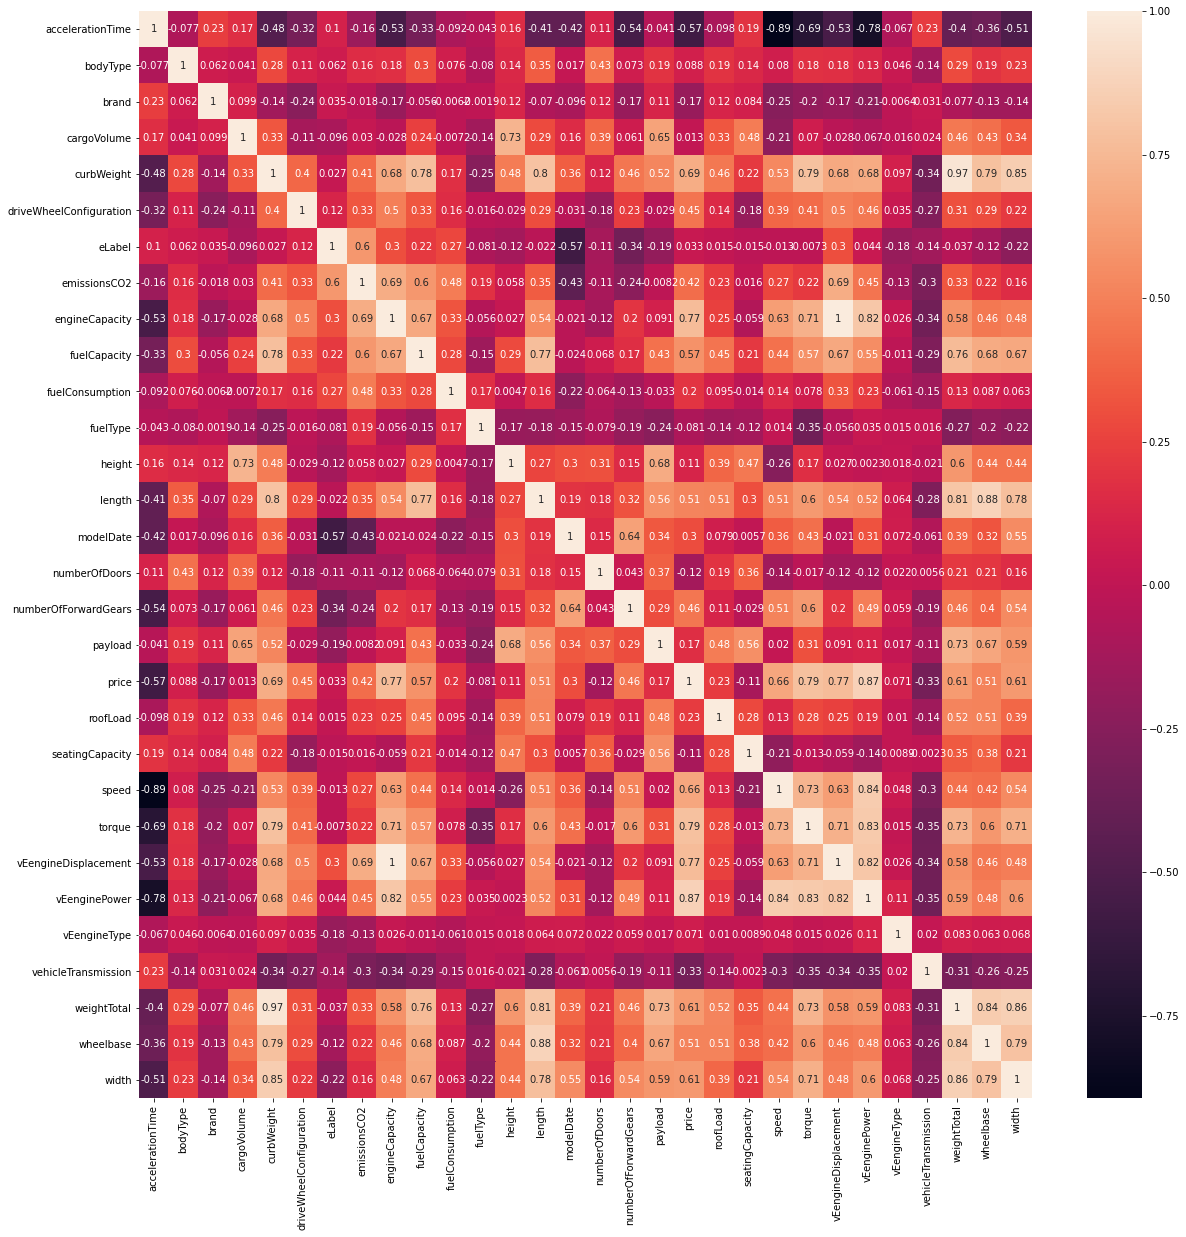

In [4]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

DROP COLUMN FUNCTION

In [5]:
def drop_column(data, cut = 0.9) :

    # Get correlation matrix and upper triangle
    corr_mtx = data.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    # up is a upper triangle
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))

    # list of drop col
    drop = list()

    for row in range(len(up)-1):
        col_idx = row + 1
        # row != col
        for col in range (col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                # We choose attribute have its mean of corr larger
                if avg_corr.iloc[row] > avg_corr.iloc[col]:
                    drop.append(row)
                else:
                    drop.append(col)

    # Make unique for element in drop
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(data.columns[[item for item in drop_set]])

    return dropcols_names

In [9]:
drop_column(df, 0.9)

['curbWeight', 'vEengineDisplacement']